# BuildWise Expert System

### 1. Import libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### 2. Define linguistic variables and membership functions

In [2]:
def define_variables():
    """
    Defines linguistic variables and their membership functions for the fuzzy system.
    Returns a tuple of all defined variables.
    """
    print('Defining linguistic variables and their fuzzy sets ')

    # ------ System Inputs -------

    # Infrastructure Evaluation (Foundation + Earth Stability + Basic Facilities)
    Foundation = ctrl.Antecedent(np.arange(0,1.1,0.1),'Foundation')
    Earth_Stability = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Earth_Stability')
    Basic_Facilities = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Basic_Facilities')
    Infrastructure = ctrl.Consequent(np.arange(0,1.1,0.1), 'Infrastructure')

    # Walls and Roofs Evaluation (Wall Stability + Roof Condition)
    Wall_Stability = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Wall_Stability')
    Roof_Condition = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Roof_Condition')
    Walls_Roofs = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Walls_Roofs')

    # Columns and Beams Evaluation (Material Strength + Load Distribution + Cracks Deformation )
    Material_Strength = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Material_Strength')
    Load_Distribution = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Load_Distribution')
    Cracks_Deformation = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Cracks_Deformation')
    Columns_Beams = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Columns_Beams')

    # New Variables 
    Number_of_Floors = ctrl.Antecedent(np.arange(0, 11, 1), 'Number_of_Floors')  # 0 to 10 floors
    Building_Age = ctrl.Antecedent(np.arange(0, 101, 1), 'Building_Age')  # 0 to 100 years
    Material_Type = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Material_Type')  # 0 to 1 (Weak to Strong)
    Exposure_to_Bombing = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Exposure_to_Bombing')  # 0 to 1 (Low to High)
    
    # ------ System Outputs -------
    damage_level = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'damage_level')
    recommendation = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'recommendation')
    
    # Define membership functions for Infrastructure inputs
    # Foundation: Poor (0 to 0.3), Moderate (0.3 to 0.7), Good (0.7 to 1)
    Foundation['Poor'] = fuzz.trimf(Foundation.universe, [0, 0, 0.4])
    Foundation['Moderate'] = fuzz.trimf(Foundation.universe, [0.4, 0.5, 0.7])
    Foundation['Good'] = fuzz.trimf(Foundation.universe, [0.7, 1, 1])

    # Earth_Stability: Unstable (0 to 0.6),Stable (0.7 to 1)
    Earth_Stability['Unstable'] = fuzz.trapmf(Earth_Stability.universe, [0, 0, 0.3, 0.6])
    Earth_Stability['Stable'] = fuzz.trapmf(Earth_Stability.universe, [0.6, 0.7, 1, 1])

    Basic_Facilities['Not Operational'] = fuzz.trapmf(Basic_Facilities.universe, [0, 0, 0.2, 0.4])
    Basic_Facilities['Needs Repair'] = fuzz.trimf(Basic_Facilities.universe, [0.3, 0.5, 0.7])
    Basic_Facilities['Operational'] = fuzz.trapmf(Basic_Facilities.universe, [0.6, 0.8, 1, 1])

    Infrastructure['Invalid'] = fuzz.trapmf(Infrastructure.universe, [0, 0, 0.3, 0.6])
    Infrastructure['Valid'] = fuzz.trapmf(Infrastructure.universe, [0.6, 0.7, 1, 1])

    # Define membership functions for Walls and Roofs
    Wall_Stability['Weak'] = fuzz.trimf(Wall_Stability.universe, [0, 0, 0.5])
    Wall_Stability['Moderate'] = fuzz.trimf(Wall_Stability.universe, [0.3, 0.5, 0.7])
    Wall_Stability['Strong'] = fuzz.trimf(Wall_Stability.universe, [0.5, 1, 1])

    Roof_Condition['Poor'] = fuzz.trimf(Roof_Condition.universe, [0, 0, 0.5])
    Roof_Condition['Average'] = fuzz.trimf(Roof_Condition.universe, [0.3, 0.5, 0.7])
    Roof_Condition['Good'] = fuzz.trimf(Roof_Condition.universe, [0.5, 1, 1])

    Walls_Roofs['Compromised'] = fuzz.trimf(Walls_Roofs.universe, [0, 0, 0.5])
    Walls_Roofs['Stable'] = fuzz.trimf(Walls_Roofs.universe, [0.5, 1, 1])

    # Define membership functions for Material_Strength
    Material_Strength['Weak'] = fuzz.trimf(Material_Strength.universe, [0, 0, 0.4])
    Material_Strength['Average'] = fuzz.trimf(Material_Strength.universe, [0.3, 0.5, 0.8])
    Material_Strength['Strong'] = fuzz.trimf(Material_Strength.universe, [0.6, 1, 1])

    Load_Distribution['Poor'] = fuzz.trimf(Load_Distribution.universe, [0, 0, 0.5])
    Load_Distribution['Balanced'] = fuzz.trimf(Load_Distribution.universe, [0.3, 0.5, 0.7])
    Load_Distribution['Excellent'] = fuzz.trimf(Load_Distribution.universe, [0.6, 1, 1])

    Cracks_Deformation['Minor'] = fuzz.trimf(Cracks_Deformation.universe, [0, 0, 0.6])
    Cracks_Deformation['Moderate'] = fuzz.trimf(Cracks_Deformation.universe, [0.4, 0.5, 0.7])
    Cracks_Deformation['Severe'] = fuzz.trimf(Cracks_Deformation.universe, [0.7, 1, 1])

    Columns_Beams['Damaged'] = fuzz.trimf(Columns_Beams.universe, [0, 0, 0.6])
    Columns_Beams['Intact'] = fuzz.trimf(Columns_Beams.universe, [0.5, 1, 1])
    
    # Define membership functions for new variables
    Number_of_Floors['Few'] = fuzz.trimf(Number_of_Floors.universe, [0, 0, 3])
    Number_of_Floors['Medium'] = fuzz.trimf(Number_of_Floors.universe, [2, 5, 8])
    Number_of_Floors['Many'] = fuzz.trimf(Number_of_Floors.universe, [7, 10, 10])

    Building_Age['New'] = fuzz.trimf(Building_Age.universe, [0, 0, 10])
    Building_Age['Medium'] = fuzz.trimf(Building_Age.universe, [5, 20, 50])
    Building_Age['Old'] = fuzz.trimf(Building_Age.universe, [40, 100, 100])

    Material_Type['Weak'] = fuzz.trimf(Material_Type.universe, [0, 0, 0.4])
    Material_Type['Medium'] = fuzz.trimf(Material_Type.universe, [0.3, 0.5, 0.7])
    Material_Type['Strong'] = fuzz.trimf(Material_Type.universe, [0.6, 1, 1])

    Exposure_to_Bombing['Low'] = fuzz.trimf(Exposure_to_Bombing.universe, [0, 0, 0.4])
    Exposure_to_Bombing['Medium'] = fuzz.trimf(Exposure_to_Bombing.universe, [0.3, 0.5, 0.7])
    Exposure_to_Bombing['High'] = fuzz.trimf(Exposure_to_Bombing.universe, [0.6, 1, 1])


    # Define membership functions for Damage Level and Recommendation
    damage_level['Minimal'] = fuzz.trimf(damage_level.universe, [0, 0, 0.5])
    damage_level['Moderate'] = fuzz.trimf(damage_level.universe, [0.3, 0.5, 0.7])
    damage_level['Severe'] = fuzz.trimf(damage_level.universe, [0.5, 1, 1])

    recommendation['No Action'] = fuzz.trimf(recommendation.universe, [0, 0, 0.5])
    recommendation['Repairs Needed'] = fuzz.trimf(recommendation.universe, [0.3, 0.5, 0.7])
    recommendation['Demolition'] = fuzz.trimf(recommendation.universe, [0.5, 1, 1])

    print("Linguistic variables and fuzzy sets defined.")
    return (Foundation, Earth_Stability, Basic_Facilities, Infrastructure,
            Number_of_Floors, Building_Age, Material_Type, Exposure_to_Bombing,
            Wall_Stability, Roof_Condition, Walls_Roofs,
            Material_Strength, Load_Distribution, Cracks_Deformation, Columns_Beams,
            damage_level, recommendation)


### 3. Visualize the membership functions

Defining linguistic variables and their fuzzy sets 
Linguistic variables and fuzzy sets defined.


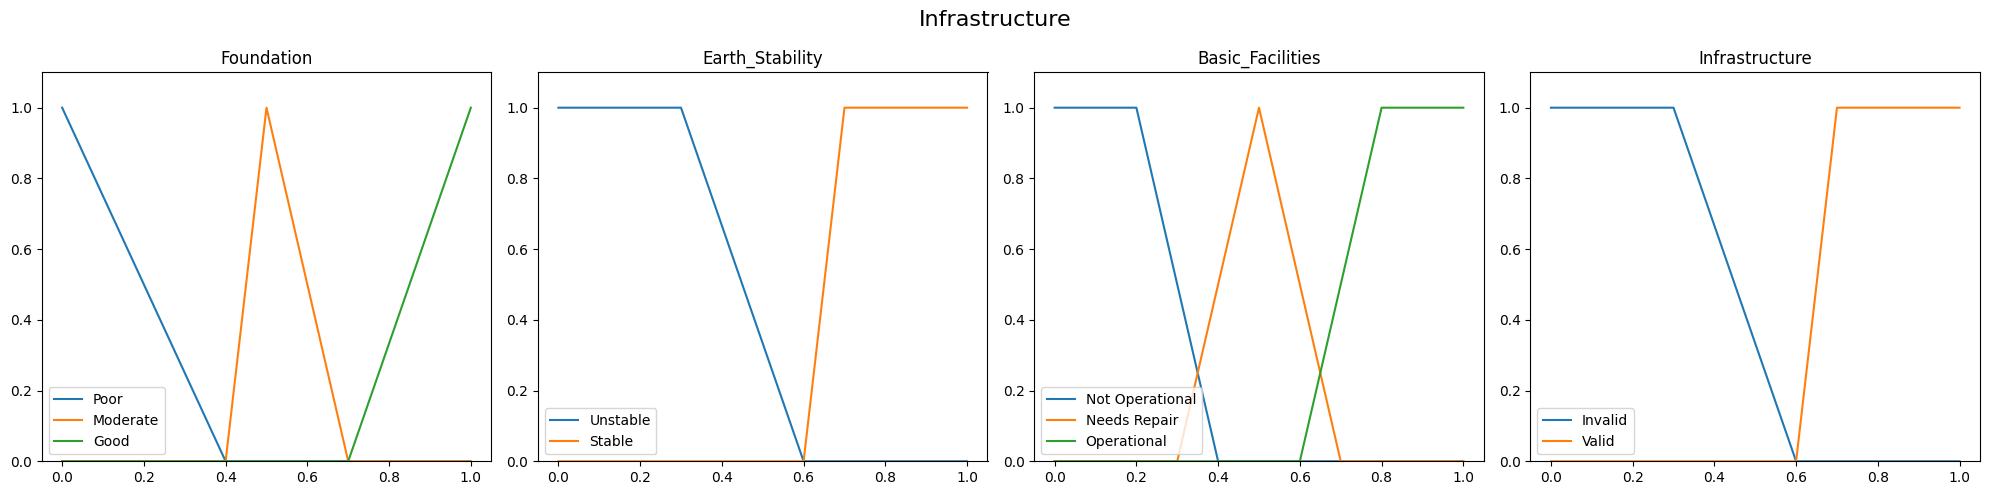

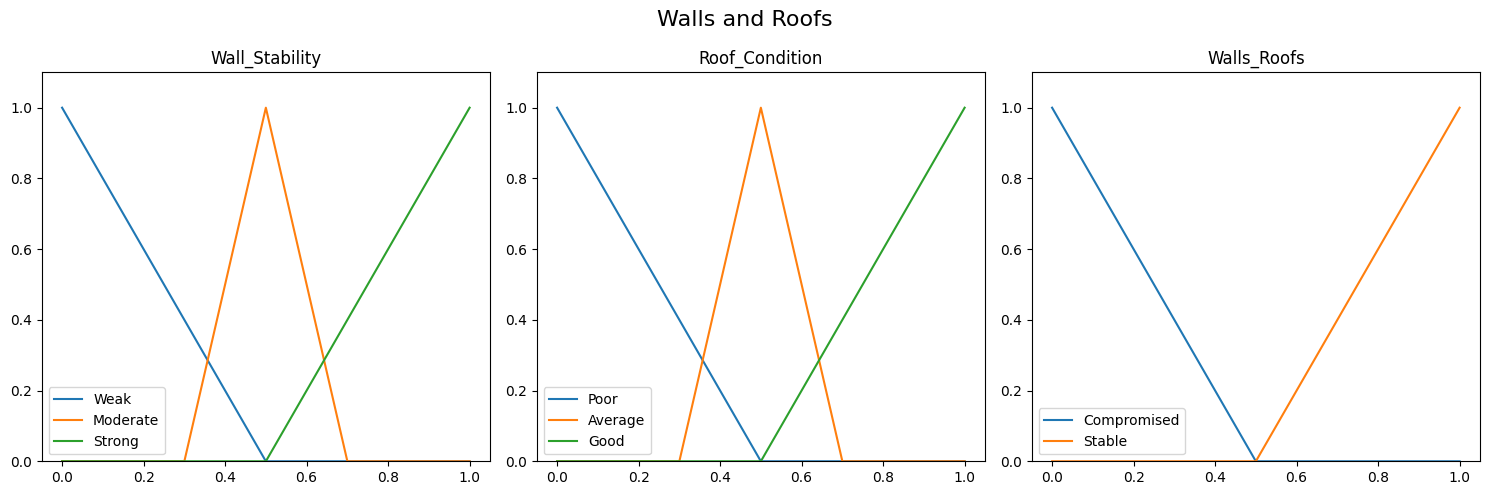

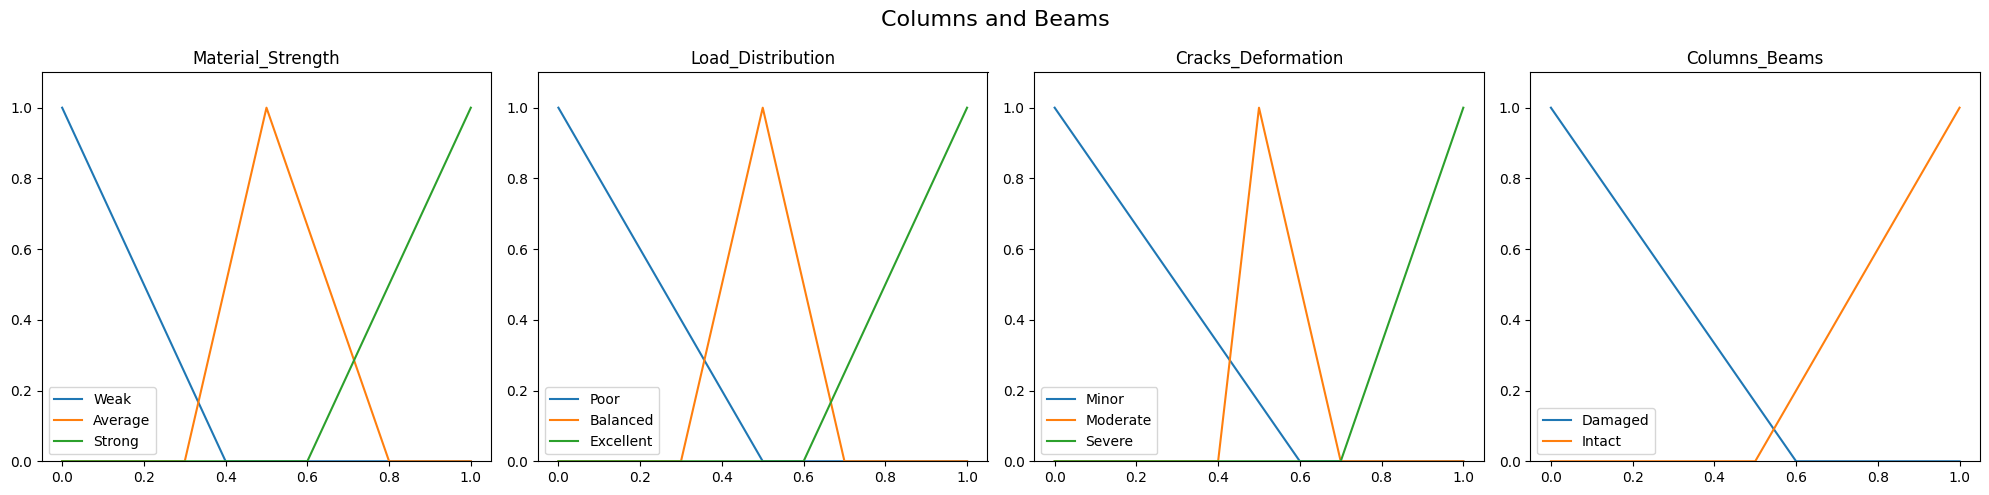

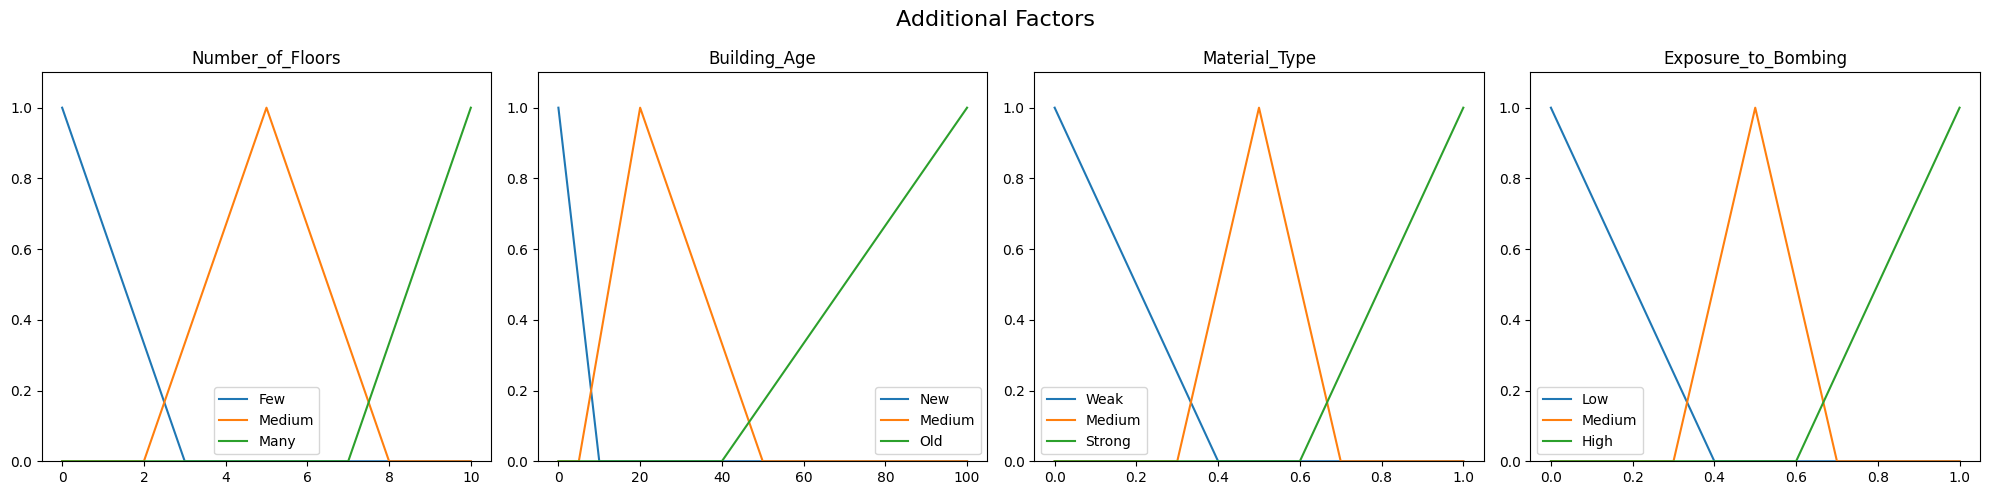

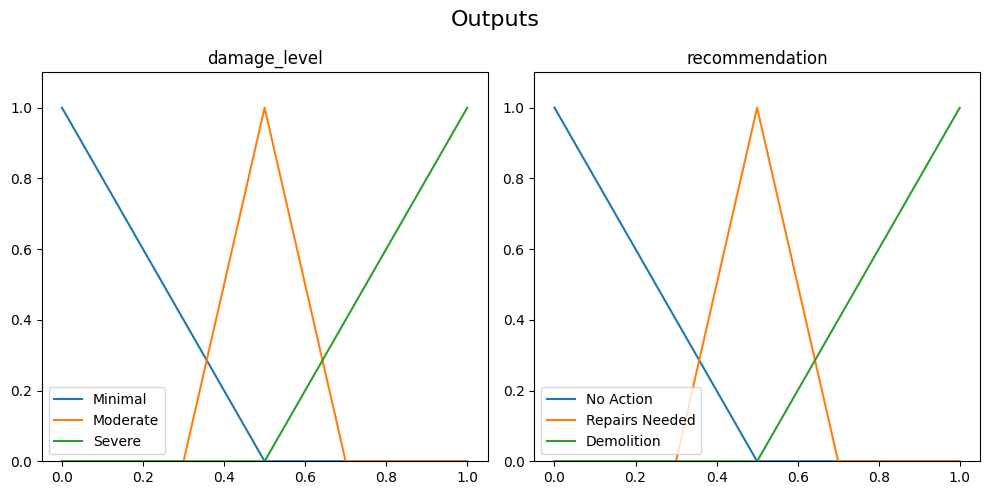

In [3]:
def plot_subsystems(variables):
    """
    Plots membership functions for each variable in its own subplot,
    with all variables of the same subsystem in the same row.
    """

    subsystems = [
        ("Infrastructure", [variables[0], variables[1], variables[2], variables[3]]),
        ("Walls and Roofs", [variables[8], variables[9], variables[10]]),
        ("Columns and Beams", [variables[11], variables[12], variables[13], variables[14]]),
        ("Additional Factors", [variables[4], variables[5], variables[6], variables[7]]),
        ("Outputs", [variables[15], variables[16]])
    ]

    for i, (subsystem_name, subsystem_vars) in enumerate(subsystems):
        num_vars = len(subsystem_vars)  
        fig, axs = plt.subplots(1, num_vars, figsize=(5 * num_vars, 5))  

        if num_vars == 1:
            axs = [axs]

        for j, var in enumerate(subsystem_vars):
            ax = axs[j]
            for term in var.terms:
                ax.plot(var.universe, fuzz.interp_membership(var.universe, var[term].mf, var.universe), label=term)
            ax.set_title(f"{var.label}")
            ax.legend()
            ax.set_ylim(0, 1.1)

        fig.suptitle(subsystem_name, fontsize=16)  
        plt.tight_layout()
        plt.show()

variables = define_variables()
plot_subsystems(variables)

### 4. Define rules

In [4]:
def define_rules(*variables):
    """
    Defines the rules for the fuzzy system.
    Returns a list of rules.
    """
    (Foundation, Earth_Stability, Basic_Facilities, Infrastructure,
     Number_of_Floors, Building_Age, Material_Type, Exposure_to_Bombing,
     Wall_Stability, Roof_Condition, Walls_Roofs,
     Material_Strength, Load_Distribution, Cracks_Deformation, Columns_Beams,
     damage_level, recommendation) = variables

    rules = []

    # Helper function to add rules
    def add_rule(conditions, consequent, value):
        rules.append(ctrl.Rule(conditions, consequent[value]))

    # Rules for Infrastructure
    for foundation in ['Poor', 'Moderate', 'Good']:
        for stability in ['Unstable', 'Stable']:
            for facilities in ['Not Operational', 'Needs Repair', 'Operational']:
                if foundation == 'Poor':
                    add_rule(Foundation[foundation] & Earth_Stability[stability] & Basic_Facilities[facilities], Infrastructure, 'Invalid')
                elif foundation == 'Moderate' and stability == 'Stable' and facilities in ['Needs Repair', 'Operational']:
                    add_rule(Foundation[foundation] & Earth_Stability[stability] & Basic_Facilities[facilities], Infrastructure, 'Valid')
                elif foundation == 'Good' and stability == 'Stable':
                    add_rule(Foundation[foundation] & Earth_Stability[stability] & Basic_Facilities[facilities], Infrastructure, 'Valid')

    # Rules for Walls and Roofs
    for wall in ['Weak', 'Moderate', 'Strong']:
        for roof in ['Poor', 'Average', 'Good']:
            if wall == 'Weak' or roof == 'Poor':
                add_rule(Wall_Stability[wall] & Roof_Condition[roof], Walls_Roofs, 'Compromised')
            else:
                add_rule(Wall_Stability[wall] & Roof_Condition[roof], Walls_Roofs, 'Stable')

    # Rules for Columns and Beams
    for strength in ['Weak', 'Average', 'Strong']:
        for load in ['Poor', 'Balanced', 'Excellent']:
            for cracks in ['Severe', 'Moderate', 'Minor']:
                if strength == 'Weak' or load == 'Poor' or cracks == 'Severe':
                    add_rule(Material_Strength[strength] & Load_Distribution[load] & Cracks_Deformation[cracks], Columns_Beams, 'Damaged')
                else:
                    add_rule(Material_Strength[strength] & Load_Distribution[load] & Cracks_Deformation[cracks], Columns_Beams, 'Intact')

    # Rules for Damage Level and Recommendation
    add_rule(Infrastructure['Invalid'] & Walls_Roofs['Compromised'] | Columns_Beams['Damaged'], damage_level, 'Severe')
    add_rule(Infrastructure['Invalid'] & Walls_Roofs['Compromised'] & Columns_Beams['Damaged'], recommendation, 'Demolition')

    add_rule(Infrastructure['Valid'] & Walls_Roofs['Stable'] & Columns_Beams['Intact'], damage_level, 'Minimal')
    add_rule(Infrastructure['Valid'] & Walls_Roofs['Stable'] & Columns_Beams['Intact'], recommendation, 'No Action')

    add_rule(Infrastructure['Valid'] & Walls_Roofs['Compromised'] & Columns_Beams['Damaged'], damage_level, 'Moderate')
    add_rule(Infrastructure['Valid'] & Walls_Roofs['Compromised'] & Columns_Beams['Damaged'], recommendation, 'Repairs Needed')

    
    # Rules for Number_of_Floors + Material_Type
    add_rule((Number_of_Floors['Many'] & Material_Type['Weak']), damage_level,'Severe')

    # Rules for Building_Age + Exposure_to_Bombing
    add_rule(
    (Building_Age['Old'] & Exposure_to_Bombing['High']), damage_level, 'Severe')


    # Rules for Material_Type + Exposure_to_Bombing
    add_rule((Material_Type['Weak'] & Exposure_to_Bombing['High']), damage_level,'Severe')

    # Rules for Minimal Damage
    add_rule((Material_Type['Strong'] & Building_Age['New'] & Exposure_to_Bombing['Low']), damage_level, 'Minimal')

    # Rules for Building_Age
    age_rules = {
        'Old': 'Severe',
        'Medium': 'Moderate',
        'New': 'Minimal'
    }
    for age, damage in age_rules.items():
        add_rule(Building_Age[age], damage_level, damage)

    # Rules for Exposure_to_Bombing
    exposure_rules = {
        'High': 'Severe',
        'Medium': 'Moderate',
        'Low': 'Minimal'
    }
    for exposure, damage in exposure_rules.items():
        add_rule(Exposure_to_Bombing[exposure], damage_level, damage)

    print("Rules defined.")
    return rules

### 5. Build the control system

In [5]:
def build_control_system(rules):
    """
    Builds the fuzzy control system.
    Returns a ControlSystemSimulation object.
    """
    print("Building control system...")
    control_system = ctrl.ControlSystem(rules)
    simulation = ctrl.ControlSystemSimulation(control_system)
    print("Control system built successfully.")
    return simulation

### 6. Classify damage level + Generate recommendation + Predict Repair Cost

In [6]:
def classify_damage(damage_percentage):
    """
    Classifies the damage level based on the percentage.
    Returns a descriptive classification.
    """
    if damage_percentage >= 70:
        return "Total damage"
    elif 30 <= damage_percentage < 70:
        return "Partial Damage"
    else:
        return "No Damage"
    


def generate_recommendation(damage_classification):
    """
    Generates a recommendation based on the damage classification.
    Returns a descriptive recommendation.
    """
    if damage_classification == "Total damage":
        return "demolition"
    elif damage_classification == "Partial Damage":
        return "Need Repair"
    else:
        return "No recommendation"
    

def predict_repair_cost(damage_percentage):
    """
    Predicts the repair cost based on the damage percentage.
    """
    if damage_percentage >= 70:
        return "High cost (Full reconstruction required)"
    elif 30 <= damage_percentage < 70:
        return "Medium cost (Partial repairs needed)"
    else:
        return "Low cost (Minor maintenance required)"

### 7. Simulate the control system

In [7]:
def simulate_control_system(simulation, inputs):
    print("Running simulation...")
    for var, value in inputs.items():
        simulation.input[var] = value
    simulation.compute()
    print("Simulation complete. Results:")

    # Get the damage level percentage
    damage_percentage = simulation.output['damage_level'] * 100
    damage_classification = classify_damage(damage_percentage)
    recommendation = generate_recommendation(damage_classification)
    repair_cost = predict_repair_cost(damage_percentage)  

    # Print the results
    print(f"Damage Level: {damage_percentage:.2f}%")
    print(f"Damage Classification: {damage_classification}")
    print(f"Recommendation: {recommendation}")
    print(f"Repair Cost: {repair_cost}")  

    return {
        'Damage Percentage': damage_percentage,
        'Damage Classification': damage_classification,
        'Recommendation': recommendation,
        'Repair Cost': repair_cost  
    }

# Test Cases

## Forward chaining

In [8]:
test_cases = [
    {
        "Foundation": 0.9,
        "Earth_Stability": 0.8,
        "Basic_Facilities": 0.9,
        "Wall_Stability": 0.9,
        "Roof_Condition": 0.9,
        "Material_Strength": 0.9,
        "Load_Distribution": 0.9,
        "Cracks_Deformation": 0.1,
        "Number_of_Floors": 3,
        "Building_Age": 5,
        "Material_Type": 0.9,
        "Exposure_to_Bombing": 0.1
    },
    {
        'Foundation': 0.9,
        'Earth_Stability': 0.8,
        'Basic_Facilities': 0.7,
        'Number_of_Floors': 3,
        'Building_Age': 10,
        'Material_Type': 0.9,
        'Exposure_to_Bombing': 0.2,
        'Wall_Stability': 0.85,
        'Roof_Condition': 0.8,
        'Material_Strength': 0.75,
        'Load_Distribution': 0.8,
        'Cracks_Deformation': 0.3
    },
    {
        'Foundation': 0.5,
        'Earth_Stability': 0.6,
        'Basic_Facilities': 0.4,
        'Number_of_Floors': 7,
        'Building_Age': 50,
        'Material_Type': 0.6,
        'Exposure_to_Bombing': 0.7,
        'Wall_Stability': 0.5,
        'Roof_Condition': 0.6,
        'Material_Strength': 0.5,
        'Load_Distribution': 0.6,
        'Cracks_Deformation': 0.5
    },
    {
        'Foundation': 0.2,
        'Earth_Stability': 0.3,
        'Basic_Facilities': 0.1,
        'Number_of_Floors': 10,
        'Building_Age': 100,
        'Material_Type': 0.3,
        'Exposure_to_Bombing': 0.9,
        'Wall_Stability': 0.2,
        'Roof_Condition': 0.3,
        'Material_Strength': 0.2,
        'Load_Distribution': 0.3,
        'Cracks_Deformation': 0.8
    },
    {
        "Foundation": 0.2,
        "Earth_Stability": 0.3,
        "Basic_Facilities": 0.4,
        "Wall_Stability": 0.3,
        "Roof_Condition": 0.4,
        "Material_Strength": 0.2,
        "Load_Distribution": 0.3,
        "Cracks_Deformation": 0.8,
        "Number_of_Floors": 10,
        "Building_Age": 80,
        "Material_Type": 0.2,
        "Exposure_to_Bombing": 0.9
    }
]

variables = define_variables()
rules = define_rules(*variables)
control_simulation = build_control_system(rules)
# Run simulations for all test cases
for i, inputs in enumerate(test_cases):
    print(f"\n-------Test Case {i+1}:-------")
    simulate_control_system(control_simulation, inputs)

Defining linguistic variables and their fuzzy sets 
Linguistic variables and fuzzy sets defined.
Rules defined.
Building control system...
Control system built successfully.

-------Test Case 1:-------
Running simulation...
Simulation complete. Results:
Damage Level: 17.50%
Damage Classification: No Damage
Recommendation: No recommendation
Repair Cost: Low cost (Minor maintenance required)

-------Test Case 2:-------
Running simulation...
Simulation complete. Results:
Damage Level: 30.02%
Damage Classification: Partial Damage
Recommendation: Need Repair
Repair Cost: Medium cost (Partial repairs needed)

-------Test Case 3:-------
Running simulation...
Simulation complete. Results:
Damage Level: 77.98%
Damage Classification: Total damage
Recommendation: demolition
Repair Cost: High cost (Full reconstruction required)

-------Test Case 4:-------
Running simulation...
Simulation complete. Results:
Damage Level: 83.33%
Damage Classification: Total damage
Recommendation: demolition
Repair C

## Backward Chaining

In [9]:
# Backward chaining function
def backward_chaining(goal, knowledge_base, known_facts, path=None):
    if path is None:
        path = []

    # If the goal is already a known fact, return True
    if goal in known_facts:
        path.append(goal)
        return True, path

    # Find rules that can derive the goal
    for rule_name, rule in knowledge_base.items():
        if rule["then"] == goal:
            # Check if all conditions in the rule are satisfied
            all_conditions_met = True
            new_path = path.copy()
            new_path.append(goal)

            for condition in rule["if"]:
                # Recursively check each condition
                result, updated_path = backward_chaining(condition, knowledge_base, known_facts, new_path)
                if not result:
                    all_conditions_met = False
                    break
                new_path = updated_path

            if all_conditions_met:
                return True, new_path

    # If no rules can derive the goal, return False
    return False, path


# Define a knowledge base for backward chaining
knowledge_base = {
    "rule1": {
        "if": ["Foundation_Poor", "Earth_Stability_Unstable", "Basic_Facilities_Not_Operational"],
        "then": "Infrastructure_Invalid"
    },
    "rule2": {
        "if": ["Infrastructure_Invalid", "Walls_Roofs_Compromised", "Columns_Beams_Damaged"],
        "then": "Damage_Level_Severe"
    },
    "rule3": {
        "if": ["Damage_Level_Severe"],
        "then": "Recommendation_Demolition"
    },
    "rule4": {
        "if": ["Foundation_Good", "Earth_Stability_Stable", "Basic_Facilities_Operational"],
        "then": "Infrastructure_Valid"
    },
    "rule5": {
        "if": ["Infrastructure_Valid", "Walls_Roofs_Stable", "Columns_Beams_Intact"],
        "then": "Damage_Level_Minimal"
    },
    "rule6": {
        "if": ["Damage_Level_Minimal"],
        "then": "Recommendation_No_Action"
    },
    "rule7": {
        "if": ["Infrastructure_Valid", "Walls_Roofs_Compromised", "Columns_Beams_Damaged"],
        "then": "Damage_Level_Moderate"
    },
    "rule8": {
        "if": ["Damage_Level_Moderate"],
        "then": "Recommendation_Repairs_Needed"
    },
    "rule9": {
        "if": ["Number_of_Floors_Many", "Material_Type_Weak"],
        "then": "Damage_Level_Severe"
    },
    "rule10": {
        "if": ["Building_Age_Old", "Exposure_to_Bombing_High"],
        "then": "Damage_Level_Severe"
    },
    "rule11": {
        "if": ["Material_Type_Weak", "Exposure_to_Bombing_High"],
        "then": "Damage_Level_Severe"
    },
    "rule12": {
        "if": ["Material_Type_Strong", "Building_Age_New", "Exposure_to_Bombing_Low"],
        "then": "Damage_Level_Minimal"
    },
    "rule13": {
        "if": ["Building_Age_Old"],
        "then": "Damage_Level_Severe"
    },
    "rule14": {
        "if": ["Building_Age_Medium"],
        "then": "Damage_Level_Moderate"
    },
    "rule15": {
        "if": ["Building_Age_New"],
        "then": "Damage_Level_Minimal"
    },
    "rule16": {
        "if": ["Exposure_to_Bombing_High"],
        "then": "Damage_Level_Severe"
    },
    "rule17": {
        "if": ["Exposure_to_Bombing_Medium"],
        "then": "Damage_Level_Moderate"
    },
    "rule18": {
        "if": ["Exposure_to_Bombing_Low"],
        "then": "Damage_Level_Minimal"
    },
}


# Example usage
def run_backward_chaining(goal, known_facts):
    result, path = backward_chaining(goal, knowledge_base, known_facts)
    if result:
        print(f"Goal '{goal}' is proven. \nPath: {' -> '.join(reversed(path))}")
    else:
        print(f"Goal '{goal}' cannot be proven.")


### Case 1

In [10]:
# known facts 1
known_facts = {
    "Foundation_Poor",
    "Earth_Stability_Unstable",
    "Basic_Facilities_Not_Operational",
    "Walls_Roofs_Compromised",
    "Columns_Beams_Damaged",
}

# Test backward chaining
goal = "Damage_Level_Severe"
run_backward_chaining(goal, known_facts)

print("\nCase 2:")
goal = "Damage_Level_Minimal"
run_backward_chaining(goal, known_facts)

Goal 'Damage_Level_Severe' is proven. 
Path: Columns_Beams_Damaged -> Walls_Roofs_Compromised -> Basic_Facilities_Not_Operational -> Earth_Stability_Unstable -> Foundation_Poor -> Infrastructure_Invalid -> Damage_Level_Severe

Case 2:
Goal 'Damage_Level_Minimal' cannot be proven.


### Case 3 

In [11]:
# known facts2
known_facts = {
    "Foundation_Poor",
    "Earth_Stability_Unstable",
    "Basic_Facilities_Not_Operational",
    "Walls_Roofs_Compromised",
    "Columns_Beams_Damaged",
}

# Test backward chaining
goal = "Recommendation_Demolition"
run_backward_chaining(goal, known_facts)

Goal 'Recommendation_Demolition' is proven. 
Path: Columns_Beams_Damaged -> Walls_Roofs_Compromised -> Basic_Facilities_Not_Operational -> Earth_Stability_Unstable -> Foundation_Poor -> Infrastructure_Invalid -> Damage_Level_Severe -> Recommendation_Demolition
